In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [20]:
df = pd.read_json('typing-data.json')
samplesCount = len(df)

In [62]:
wpmDf = (df.length/(df.time*0.001)*60/5)
kpmDf = (df.length/(df.time*0.001)*60)

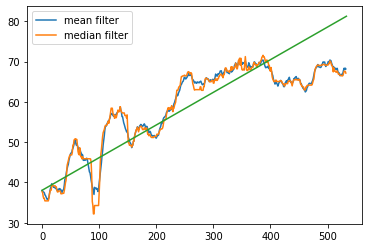

In [214]:
def meanFilter(signal, wnd):
    filtered = []
    for i in range(wnd + 1, len(signal) - wnd - 1):
        filtered.append(signal[i:i+wnd].mean())
    return filtered

def medianFilter(signal, wnd):
    filtered = []
    for i in range(wnd + 1, len(signal) - wnd - 1):
        filtered.append(np.median(signal[i:i+wnd]))
    return filtered

def trendLine(signal):
    trend = np.polyfit(range(0, len(signal)), signal, 1)
    return trend

wpmFilteredMean = meanFilter(np.array(wpmDf.values), 20)
wpmFilteredMedian = medianFilter(np.array(wpmDf.values), 20)

fig = plt.figure()
plt.plot(wpmFilteredMean, label="mean filter")
plt.plot(wpmFilteredMedian, label="median filter")
# plt.plot(wpmDf, label="original")
plt.legend(loc='upper left')

trendStart, trendEnd = (0, len(wpmFilteredMean))
wpmTrend = trendLine(wpmFilteredMean[trendStart : trendEnd]) + wpmFilteredMean[trendStart]
plt.plot(np.linspace(trendStart, trendEnd, len(wpmTrend)), wpmTrend)
